# 觀察每首歌的聆聽時間

In [17]:
import pandas as pd
from tqdm import tqdm
# index, session_id, song_id, unix_played_at, play_status, login_type, listening_order
train_source = pd.read_parquet("data/label_train_source.parquet")
# index, session_id, song_id, unix_played_at, play_status, login_type, listening_order
train_target = pd.read_parquet("data/label_train_target.parquet")
# index, session_id, song_id, unix_played_at, play_status, login_type, listening_order
test_source = pd.read_parquet("data/label_test_source.parquet")
# index, song_id, artist_id, song_length, album_id, language_id, album_month
meta_song = pd.read_parquet("data/meta_song.parquet")
# index, song_id, composer_id
meta_song_composer = pd.read_parquet("data/meta_song_composer.parquet")
# index, song_id, genre_id
meta_song_genre = pd.read_parquet("data/meta_song_genre.parquet")
# index, song_id, lyricist_id
meta_song_lyricist = pd.read_parquet("data/meta_song_lyricist.parquet")
# index, song_id, producer_id
meta_song_producer = pd.read_parquet("data/meta_song_producer.parquet")
# index, song_id, title_text_id
meta_song_titletext = pd.read_parquet("data/meta_song_titletext.parquet")

In [18]:
song_to_length = dict()

for row in tqdm(meta_song.itertuples(), total=len(meta_song)):
    song_to_length[row.song_id] = row.song_length

100%|██████████| 1030712/1030712 [00:00<00:00, 1240509.05it/s]


In [19]:
train_all = pd.concat([train_source, train_target], ignore_index=True)
train_all = train_all.sort_values(by=['session_id', 'listening_order'])

In [20]:
train_all['song_length'] = train_all['song_id'].map(song_to_length)
train_target['song_length'] = train_target['song_id'].map(song_to_length)

## 計算每一首跟下一首的 unix_played_at 的差距
- listening_order = 25 跳過
  

In [21]:
# Calculate the time difference between current song and next song, that is the listening duration
# ps. unix_played_at unit is second
train_all['listening_seconds'] = train_all['unix_played_at'].diff(periods=-1).abs()
train_target['listening_seconds'] = train_target['unix_played_at'].diff(periods=-1).abs()

In [22]:
# find the row "listening_order" == 25, listening_seconds should be NaN
train_all.loc[train_all['listening_order'] == 25, 'listening_seconds'] = None

In [23]:
train_all.head(25)
# 可以看到，session_id 5 ~ 17 都是被跳過的歌，代表使用者可能不喜歡

,session_id,song_id,unix_played_at,play_status,login_type,listening_order,song_length,listening_seconds
10952316,1,f6f06a71bb8bc38af6c0b7dae9cab00d,1660012505,0,7,1,224.0,225.0
10952317,1,7b48a87effd31c9c07b68ed212062854,1660012730,0,7,2,NaN,2383.0
10952318,1,61c46d6401aab1dde7c7de23dc55c037,1660015113,0,7,3,175.0,176.0
10952319,1,7e54c9199aad70e35fe256d23701bad0,1660015289,0,7,4,265.0,552.0
10952320,1,6178580fa01b62e9b52787902c0d8ae6,1660015841,0,7,5,275.0,1.0
10952321,1,ab694649c65477d0bc574bf391a3f4a0,1660015842,0,7,6,242.0,4.0
10952322,1,5b3387fa195672dcfe979d17e4a62c9e,1660015846,0,7,7,254.0,0.0
10952323,1,2790c612d8d301e2f35550c75aea8c75,1660015846,0,7,8,232.0,2.0
10952324,1,d36c6cf30154e18e6c972704206d6b1e,1660015848,0,7,9,259.0,2.0
10952325,1,1cbcc681ecf7acef4948bff2eb8e39d7,1660015850,0,7,10,246.0,2.0


# 計算 `聽的長度 / 歌的長度` = `elapsed_ratio`
- 不知道這段時間算不算在重複聽，會不會中間有暫停？所以先用 `elapsed_ratio` 當名字

In [24]:
train_all['elapsed_ratio'] = train_all['listening_seconds'] / train_all['song_length']
train_target['elapsed_ratio'] = train_target['listening_seconds'] / train_target['song_length']

In [25]:
train_all['elapsed_ratio'].describe()

count    1.193020e+07
mean     1.233560e+01
std      1.833822e+02
min      0.000000e+00
25%      1.423488e-02
50%      7.727273e-01
75%      1.004386e+00
max      2.190945e+05
Name: elapsed_ratio, dtype: float64

In [26]:
# Cound nan ratio in song_length
train_all['song_length'].isna().sum() / len(train_all)

0.1313388518136019

In [27]:
train_all.head()

,session_id,song_id,unix_played_at,play_status,login_type,listening_order,song_length,listening_seconds,elapsed_ratio
10952316,1,f6f06a71bb8bc38af6c0b7dae9cab00d,1660012505,0,7,1,224.0,225.0,1.004464
10952317,1,7b48a87effd31c9c07b68ed212062854,1660012730,0,7,2,NaN,2383.0,NaN
10952318,1,61c46d6401aab1dde7c7de23dc55c037,1660015113,0,7,3,175.0,176.0,1.005714
10952319,1,7e54c9199aad70e35fe256d23701bad0,1660015289,0,7,4,265.0,552.0,2.083019
10952320,1,6178580fa01b62e9b52787902c0d8ae6,1660015841,0,7,5,275.0,1.0,0.003636


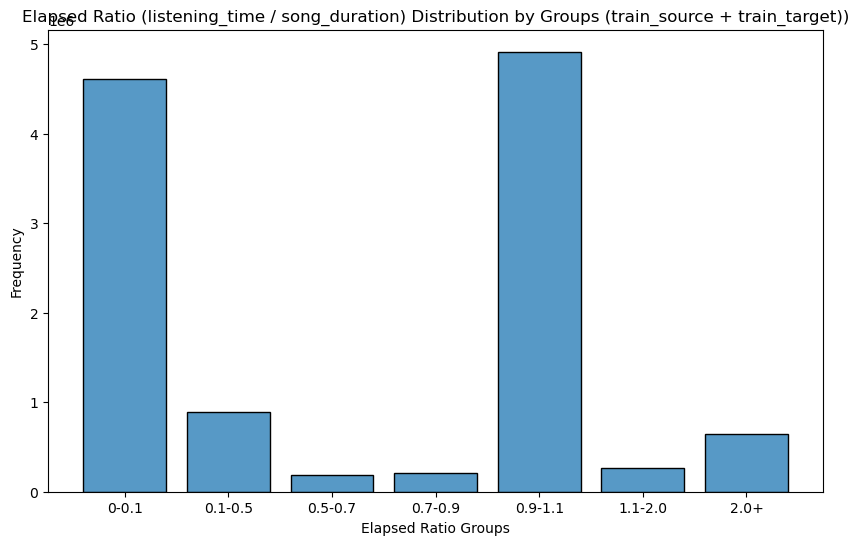

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 設定分組的範圍
bins = [0, 0.1, 0.5, 0.7, 0.9, 1.1, 2.0, float('inf')]
labels = ['0-0.1', '0.1-0.5', '0.5-0.7', '0.7-0.9', '0.9-1.1', '1.1-2.0', '2.0+']

# 使用 cut 函數將資料分組
train_all['elapsed_ratio_group'] = pd.cut(train_all['elapsed_ratio'], bins=bins, labels= labels)

# 繪製直方圖
plt.figure(figsize=(10, 6))
sns.histplot(train_all['elapsed_ratio_group'], discrete=True, shrink=0.8)
plt.title('Elapsed Ratio (listening_time / song_duration) Distribution by Groups (train_source + train_target))')
plt.xlabel('Elapsed Ratio Groups')
plt.ylabel('Frequency')
plt.show()


In [29]:
train_all['elapsed_ratio_group'].value_counts()

elapsed_ratio_group
0.9-1.1    4916887
0-0.1      4612380
0.1-0.5     888714
2.0+        641457
1.1-2.0     266741
0.7-0.9     209486
0.5-0.7     188038
Name: count, dtype: int64

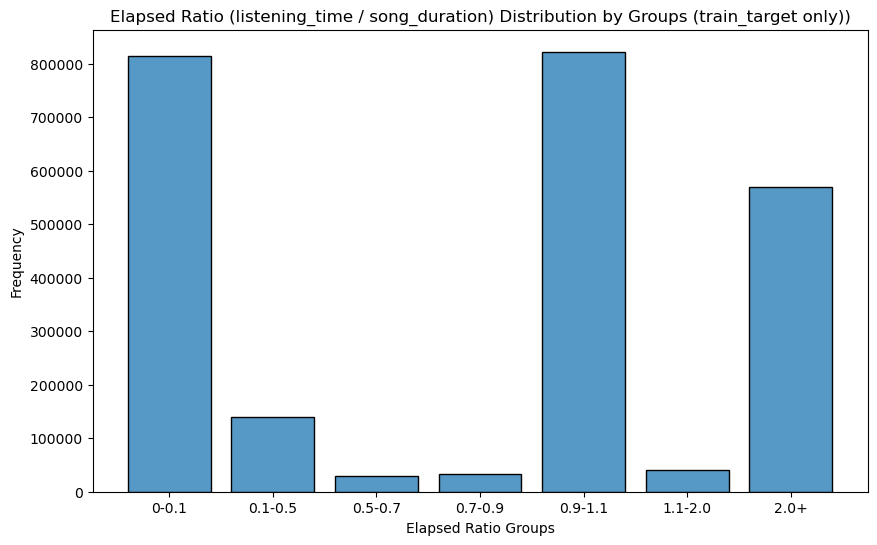

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 設定分組的範圍
bins = [0, 0.1, 0.5, 0.7, 0.9, 1.1, 2.0, float('inf')]
labels = ['0-0.1', '0.1-0.5', '0.5-0.7', '0.7-0.9', '0.9-1.1', '1.1-2.0', '2.0+']

# 使用 cut 函數將資料分組
train_all['elapsed_ratio_group'] = pd.cut(train_target['elapsed_ratio'], bins=bins, labels= labels)

# 繪製直方圖
plt.figure(figsize=(10, 6))
sns.histplot(train_all['elapsed_ratio_group'], discrete=True, shrink=0.8)
plt.title('Elapsed Ratio (listening_time / song_duration) Distribution by Groups (train_target only))')
plt.xlabel('Elapsed Ratio Groups')
plt.ylabel('Frequency')
plt.show()


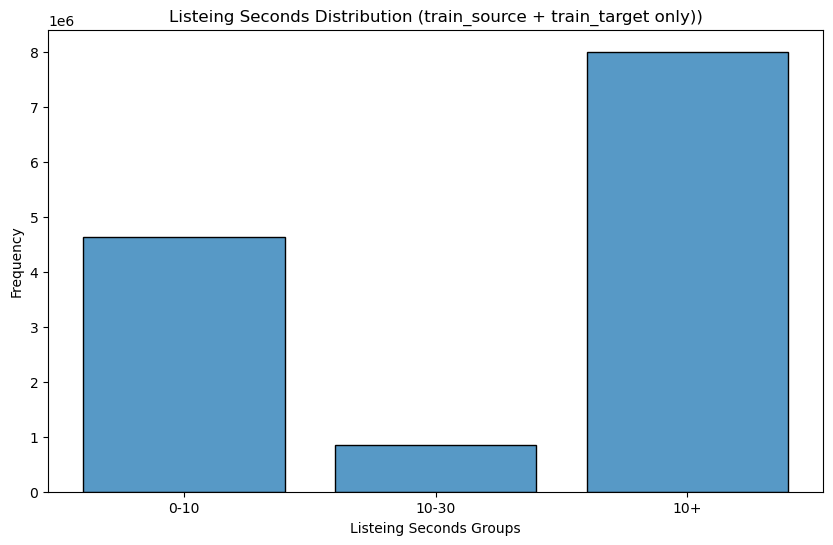

In [31]:
# 直接以聆聽秒數分組
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 設定分組的範圍
bins = [0, 10, 30, float('inf')]
labels = ['0-10', '10-30', '10+']

# 使用 cut 函數將資料分組
train_all['listening_time_group'] = pd.cut(train_all['listening_seconds'], bins=bins, labels= labels)

# 繪製直方圖
plt.figure(figsize=(10, 6))
sns.histplot(train_all['listening_time_group'], discrete=True, shrink=0.8)
plt.title('Listeing Seconds Distribution (train_source + train_target only))')
plt.xlabel('Listeing Seconds Groups')
plt.ylabel('Frequency')
plt.show()


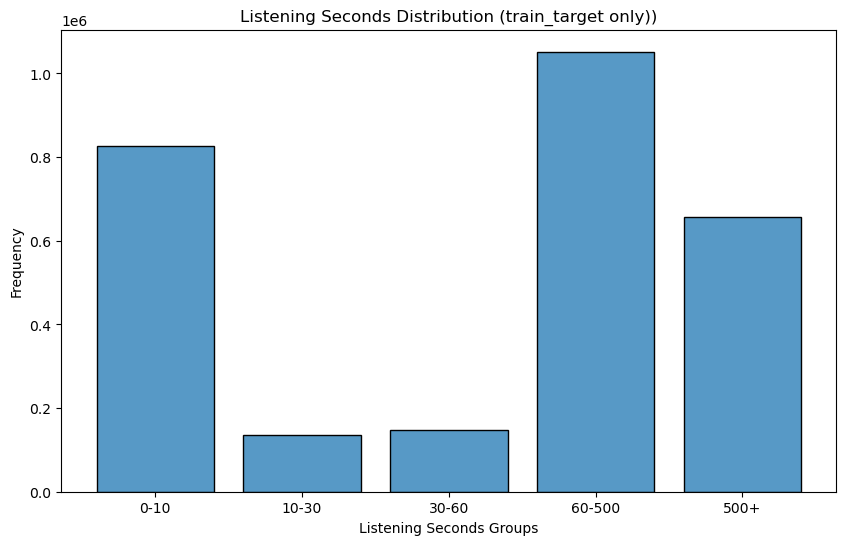

In [34]:
# 直接以聆聽秒數分組

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 設定分組的範圍
bins = [0, 10, 30, 60 ,500, float('inf')]
labels = ['0-10', '10-30', '30-60', '60-500', '500+']

# 使用 cut 函數將資料分組
train_all['listening_time_group'] = pd.cut(train_target['listening_seconds'], bins=bins, labels= labels)

# 繪製直方圖
plt.figure(figsize=(10, 6))
sns.histplot(train_all['listening_time_group'], discrete=True, shrink=0.8)
plt.title('Listening Seconds Distribution (train_target only))')
plt.xlabel('Listening Seconds Groups')
plt.ylabel('Frequency')
plt.show()